In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
import pandas as pd

# Step 1: Read the CSV file
csv_file_path = r'C:\Users\Lehnert Lab\Desktop\mexDynamicScanning\scanDir\vis\visFreq.csv'  # Replace this with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Step 2: Multiply every element by a factor
factor = 1e6  # Replace this with your desired factor
df = df * factor

# Step 3: Save the updated DataFrame back to the original CSV
df.to_csv(csv_file_path, index=False)

# Processing The 3/7 Run

In [3]:
runData = {}

In [4]:
runPath = r'C:\Users\Lehnert Lab\Desktop\mexDynamicScanning\scanDir\runs'
runs = [f for f in os.listdir(runPath)]

for run in runs:
    dataPath = runPath + '\\' + run + r'\data'
    runData[run] = [np.loadtxt(os.path.join(dataPath, file), delimiter=",") for file in os.listdir(dataPath)]

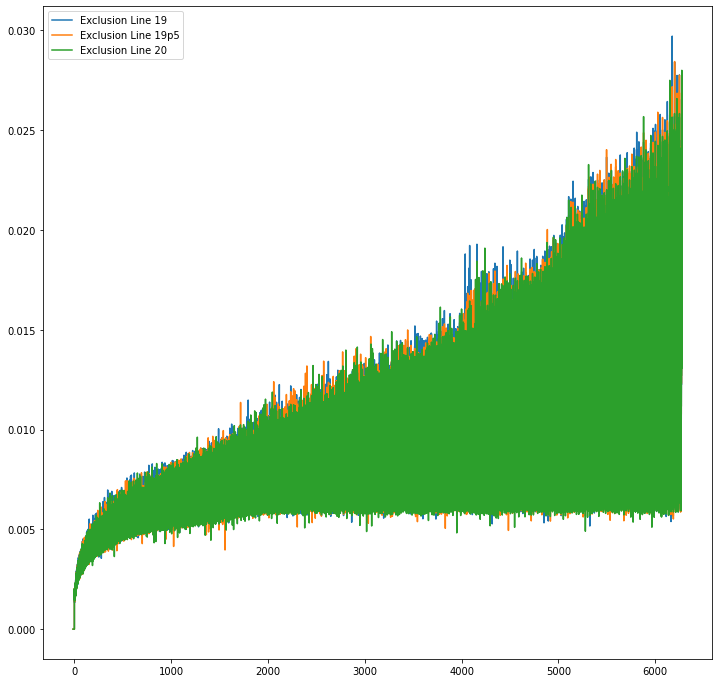

In [4]:
plt.figure(figsize=(12,12))

for key in runData.keys():
    label = f"Exclusion Line {key}"
    plt.plot(runData[key][-1][1], runData[key][-1][0], label=label)
    
# plt.axhline(y=target, color="r", linestyle="-", label="Target Exclusion")

plt.ylim([0.00025,0.0005])


plt.legend()
plt.show()

In [12]:
print(len(runData['19'][-1][1][:-1]))
print(len(runData['19'][-1][1][1:]))

6288249
6288249


(1187.0, 1188.0)

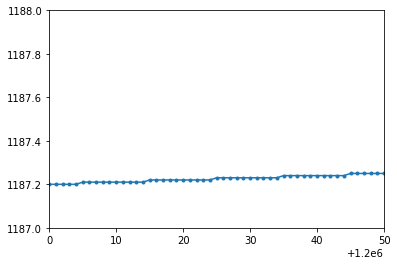

In [16]:
plt.plot(runData['19'][-1][1][:-1], marker='.')

plt.xlim([1.2e6, 1.20005e6])
plt.ylim([1.187e3, 1.188e3])

# Old

In [2]:
savePath = r'C:\Users\Lehnert Lab\Desktop\mexDynamicScanning\scanDir\save'

# Get a list of all .csv files in the "data" folder
metric_folder = savePath + r'\metrics'
metric_files = [f for f in os.listdir(metric_folder) if f.endswith(".csv")]

# Load data from each .csv file and store it in the data_arrays list
metric_arrays = []
for csv_file in metric_files:
    file_path = os.path.join(metric_folder, csv_file)
    data = np.loadtxt(file_path, delimiter=",")
    metric_arrays.append(data)


# Get a list of all .csv files in the "data" folder
data_folder = savePath + r'\data'
csv_files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]

# Load data from each .csv file and store it in the data_arrays list
data_arrays = []
for csv_file in csv_files:
    file_path = os.path.join(data_folder, csv_file)
    data = np.loadtxt(file_path, delimiter=",")
    data_arrays.append(data)


print(metric_arrays)

[array(1900.), array([1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900.]), array([1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900.]), array([1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900.]), array([1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900., 1900.]), array([1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900

In [20]:
final19 = np.loadtxt(os.path.join(data_folder, 'exclusionLine_2024-03-06_21-41-52.csv'), delimiter = ',')
first19p5 = np.loadtxt(os.path.join(data_folder, 'exclusionLine_2024-03-06_21-42-16.csv'), delimiter = ',')

In [24]:
len(final19[0])

291599

In [23]:
len(first19p5[0])

25599

In [27]:
split_data = []
foo = data_arrays[0]

for i in range(1, len(data_arrays)-1):
    if len(data_arrays[i-1][0]) > len(data_arrays[i][0]):
        split_data += [foo]
        foo = []
        
    foo = np.append(foo, [data_arrays[i]])

In [29]:
split_data

array([  0.   ,   0.   ,   0.   , ..., 278.797, 278.798, 278.799])

In [15]:
diff = len(data_arrays[1][0])

28359

In [14]:
len(data_arrays[-1][0])

291599

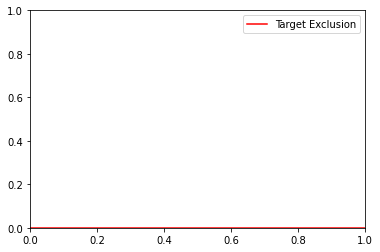

In [40]:
# Plot each data array in data_arrays
target = 4.2e-5
plt.figure()

for i, data in enumerate(data_arrays):
    label = f"Exclusion Line {i + 1}"
    plt.plot(data[1], data[0], label=label)
plt.axhline(y=target, color="r", linestyle="-", label="Target Exclusion")




plt.legend()
plt.show()